In [ ]:
conda install -c https://conda.anaconda.org/anaconda pandas-datareader

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
from pandas import Series, DataFrame
import numpy as np
import datetime

In [6]:
%matplotlib inline

In [7]:
style.use('ggplot')
pd.set_option('display.max_columns',10)
pd.set_option('display.width',500)

In [12]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,1,1)

df = web.DataReader(['AAPL','GE','GOOG','IBM'],'yahoo',start=start,end=end)  # DataReader param : stock,source,start,end


In [15]:
df['Adj Close']

Symbols,AAPL,GE,GOOG,IBM
Date,,,,
2018-01-02,167.199890,16.726093,1065.000000,140.820740
2018-01-03,167.170776,16.884241,1082.479980,144.691605
2018-01-04,167.947266,17.237741,1086.400024,147.622131
2018-01-05,169.859406,17.247042,1102.229980,148.343353
2018-01-08,169.228500,17.005173,1106.939941,149.238037
...,...,...,...,...
2019-12-24,284.269989,11.190000,1343.560059,134.979996
2019-12-26,289.910004,11.230000,1360.400024,134.910004
2019-12-27,289.799988,11.180000,1351.890015,135.270004


In [23]:
close_px = df["Adj Close"]['AAPL']
mavg = close_px.rolling(window=100)

In [26]:
retscomp = df.pct_change()
corr = retscomp.corr()

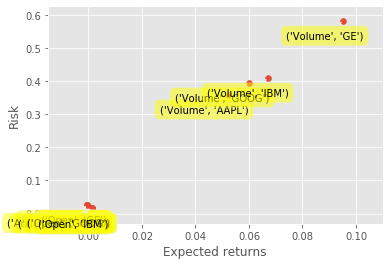

In [28]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))